In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=10, h2=11, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [63]:
torch.manual_seed(32)  # For reproducibility
model = Model()

In [64]:
df = pd.read_csv('iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [65]:
X = df.drop('target', axis=1).values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))  # Not needed with CrossEntropyLoss
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [66]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)

testloader = DataLoader(X_test, batch_size=60, shuffle=False)

In [67]:
torch.manual_seed(4)
model = Model()

In [68]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [69]:
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)

    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 1.22303259
epoch: 11  loss: 1.12153995
epoch: 21  loss: 1.05495214
epoch: 31  loss: 1.01303518
epoch: 41  loss: 0.98299688
epoch: 51  loss: 0.95256072
epoch: 61  loss: 0.91944015
epoch: 71  loss: 0.88376749
epoch: 81  loss: 0.84556162
epoch: 91  loss: 0.80463970


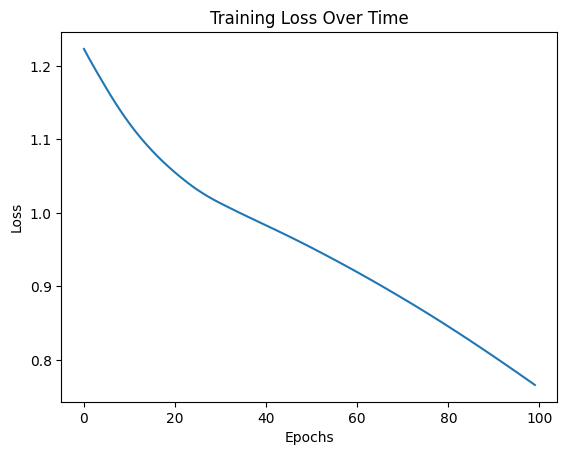

In [70]:
plt.plot(range(epochs), [loss.detach().numpy() for loss in losses])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

In [71]:
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.75622016


In [81]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-0.5101,  0.1583,  0.1909])     1
 2. tensor([-0.5555,  0.1529,  0.2525])     1
 3. tensor([ 0.1100, -0.4122, -0.8012])     0
 4. tensor([-0.6372,  0.2374,  0.3850])     1
 5. tensor([-0.7789,  0.4115,  0.6288])     2
 6. tensor([-0.9214,  0.5103,  0.8318])     2
 7. tensor([ 0.0911, -0.3903, -0.7673])     0
 8. tensor([ 0.1470, -0.4734, -0.8682])     0
 9. tensor([-0.7731,  0.3890,  0.6111])     2
10. tensor([-0.8862,  0.4614,  0.7789])     2
11. tensor([-0.9104,  0.4910,  0.8196])     2
12. tensor([ 0.1270, -0.4192, -0.8268])     0
13. tensor([-0.8405,  0.4419,  0.7070])     2
14. tensor([-0.6099,  0.2400,  0.3501])     1
15. tensor([-0.8138,  0.3773,  0.6545])     2
16. tensor([-0.5437,  0.1548,  0.2371])     1
17. tensor([-0.6753,  0.3000,  0.4498])     2
18. tensor([ 0.1479, -0.4758, -0.8680])     0
19. tensor([-0.5938,  0.2155,  0.3197])     1
20. tensor([-0.8531,  0.4350,  0.7362])     2
21. tensor([ 0.1224, -0.4352, -0.8232])     0
22. tensor([ 0.1288, -0.4825, -0.8

In [82]:
torch.save(model.state_dict(), 'vedhashree.pt')

In [83]:
new_model = Model()
new_model.load_state_dict(torch.load('vedhashree.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=11, bias=True)
  (out): Linear(in_features=11, out_features=3, bias=True)
)

In [84]:
with torch.no_grad():
    y_val = new_model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.75622016


In [85]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

In [86]:

labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']


In [87]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print()
    print(labels[new_model(mystery_iris).argmax()])

tensor([ 0.0152, -0.3604, -0.6567])

Iris setosa
